# Explore here

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()


# Spotify API credentials
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")



In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [3]:
artist_id = "3TVXtAsR1Inumwj472S9r4"

# Get the top tracks of an artist
results = spotify.artist_top_tracks(artist_id)

songs = []
for track in results['tracks']:
    songs.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': track['duration_ms'] / 60000
    })

In [4]:

tracks_df = pd.DataFrame(songs)

print(tracks_df.head(3))

         name  popularity  duration_min
0       NOKIA          92      4.017050
1  DIE TRYING          88      3.257183
2   One Dance          87      2.899767


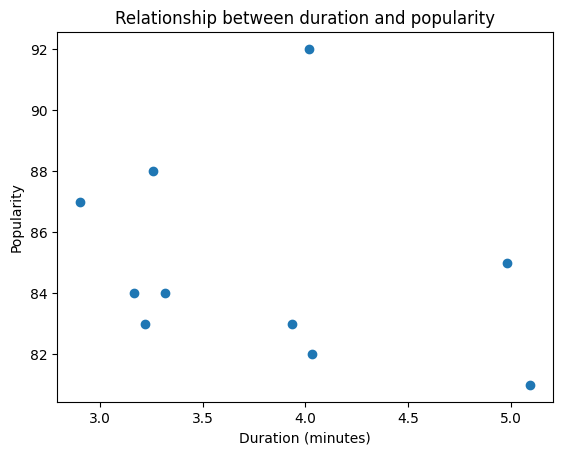

In [7]:
plt.scatter(tracks_df['duration_min'], tracks_df['popularity'])
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.title('Relationship between duration and popularity')
plt.show()